# Check perturbation experiment output

plot differences in ustar, ssh, 

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from glob import glob
import xarray as xr
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import numpy as np
import textwrap

## Set model paths

In [3]:
base = '/archive/Marion.Alberty/FMS2021.02_mom6_devgfdl_20221223/'
hist = ['gfdl.ncrc4-intel18-prod/history/19580101.ocean_daily.nc', 
        'gfdl.ncrc4-intel18-prod/history/19580101.ocean_static.nc',
        'gfdl.ncrc4-intel18-prod/history/19580101.ice_daily.nc']

In [4]:
# output
path_ctrl = [base + 'OM4p25_JRA55do1.4_r6_BeringWindPert_control/' + file for file in hist]
path_v0 = [base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v0/' + file for file in hist]
path_v1 = [base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v1/' + file for file in hist]
path_v2 = [base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v2.5/' + file for file in hist]
path_v5 = [base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v5/' + file for file in hist]
path_v10 = [base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v10/' + file for file in hist]
path_v20 = [base + 'OM4p25_JRA55do1.4_r6_BWP_68.193_Lx300_Ly500_tau28_v20/' + file for file in hist]

## Read in model data

In [5]:
def open_model_data(flist):
    v2drop = ['average_DT', 'average_T1', 'average_T2','time_bnds','xTe','yTe']
    # open and clean up model data
    DS = xr.open_mfdataset(flist,use_cftime=True,combine='by_coords',engine='netcdf4',
                           drop_variables=v2drop)
    # Clean up coordinate names
    crds2chng = [match for match in list(DS.coords) if "_sub01" in match]
    for i in crds2chng:
        DS = DS.rename_dims({i:i[:2]}).rename({i:i[:2]})
        
    # drop ice coords and swap ice dims to ocean dims
    DS = DS.drop(('xT','yT')).rename({'xT':'xh','yT':'yh'}) 
    
    # assign geolat and geolon from ocean static
    DS = DS.set_coords(['geolon','geolat','geolon_c','geolat_c',
                        'geolon_u','geolat_u','geolon_v','geolat_v'])
        
    return DS.squeeze()

In [6]:
DS_ctrl = open_model_data(path_ctrl)
DS_v0 = open_model_data(path_v0)
DS_v1 = open_model_data(path_v1)
DS_v2 = open_model_data(path_v2)
DS_v5 = open_model_data(path_v5)
DS_v10 = open_model_data(path_v10)
DS_v20 = open_model_data(path_v20)

In [7]:
DS_ctrl

<xarray.Dataset>
Dimensions:       (ct: 5, nv: 2, time: 366, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * time          (time) object 1958-01-01 00:00:00 ... 1958-12-31 12:00:00
  * nv            (nv) float64 1.0 2.0
  * ct            (ct) float64 1e-10 0.1 0.3 0.7 1.1
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
    geolon        (yh, xh) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    geolat        (yh, xh) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    geolon_c      (yq, xq) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    geolat_c      (yq, xq) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    geolon_u      (yh, xq) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    geolat_u      (yh, xq) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    geolon_v      (yq, xh) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    geolat_v      (yq, xh) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
Data variables:
    BHEAT         (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    BMELT         (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    BSNK          (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    CN            (time, ct, yh, xh) float32 dask.array<chunksize=(366, 5, 1080, 1440), meta=np.ndarray>
    LH            (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    LSNK          (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    LSRC          (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    LW            (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    SH            (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    SSH           (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    SSS           (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    SST           (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    SW            (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    TMELT         (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    XPRT          (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    siu           (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    siv           (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    sitemptop     (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    siconc        (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    sisnconc      (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    simass        (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    sisnmass      (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    sisnthick     (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    sithick       (time, yh, xh) float32 dask.array<chunksize=(366, 1080, 1440), meta=np.ndarray>
    areacello     (yh, xh) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    deptho        (yh, xh) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    hfgeou        (yh, xh) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    sftof         (yh, xh) float32 dask.array<chunksize=(1080, 

## Make some simple plots of departures from the control

In [8]:
def plt_2D_pert(ax,var2d,vmm,drop_left):
    # get lat coord
    nlat = [s for s in list(DS_ctrl[var2d].coords) if "lat" in s][0]
    # get lon coord
    nlon = [s for s in list(DS_ctrl[var2d].coords) if "lon" in s][0]
    
    # Pull variabiles for plotting
    x = DS_ctrl[nlon]
    y = DS_ctrl[nlat]
    z = (DS_v20[var2d] - DS_ctrl[var2d]).sel(time=slice('1958-04-01',None)).mean('time')
    
    # Specify data projection
    crs = ccrs.PlateCarree()
    
    # plot variable
    im = ax.pcolormesh(x,y,z,transform=crs,cmap='cmo.balance',
                       vmin=-vmm,vmax=vmm,rasterized=True)
    # add colorbar
    cbar = plt.colorbar(im,ax=ax,fraction=0.03,pad=0.02,extend='both')
    # colorbar label with units
    cbar.set_label(f'[{DS_ctrl[var2d].units}]',fontsize=12)
    # title
    if 'standard_name' in list(DS_ctrl[var2d].attrs.keys()):
        ax.set_title(DS_ctrl[var2d].standard_name.replace('_',' '))
    else:
        ax.set_title(textwrap.fill(DS_ctrl[var2d].long_name,width=30))
    
    # Zoom in around Bering Strait
    ax.set_extent([-190,-150,55,80],crs=crs)
    
    # Add a land mask to your plot, as well as grid lines and coastlines
    ax.add_feature(cfeature.LAND,zorder=9,facecolor='darkgray')
    gl = ax.gridlines(draw_labels=True,dms=True,x_inline=False,y_inline=False,
                      crs=crs,xlocs=[170,-180,-170,-160,-150,])
    gl.xlabels_top = False
    gl.ylabels_right = False
    if drop_left:
        gl.ylabels_left = False
    ax.coastlines()
    return

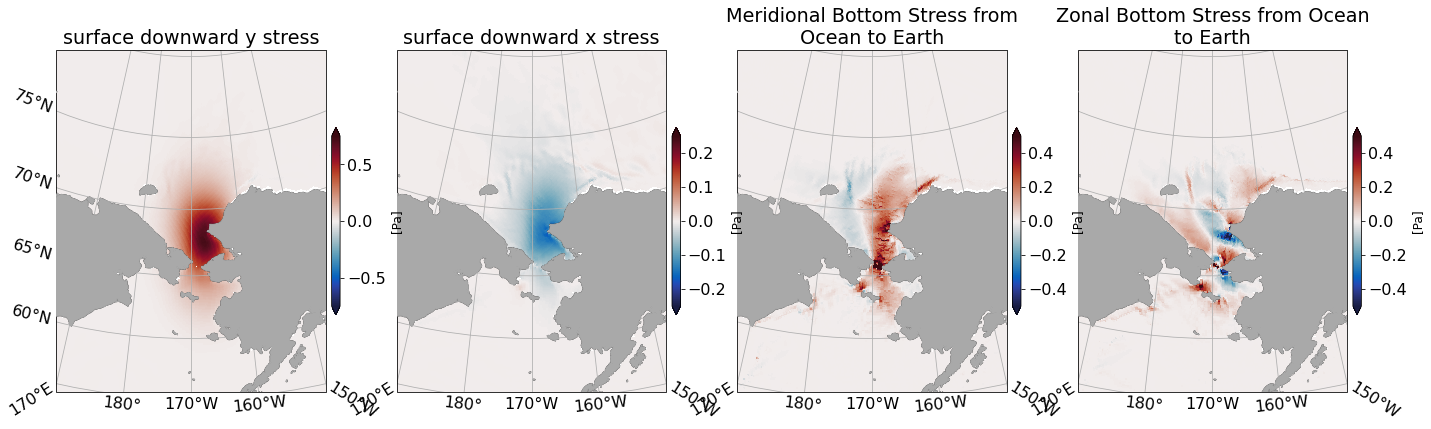

In [11]:
# Surface and bottom stresses
fig,ax = plt.subplotfig,ax = plt.subplots(figsize=(25,10),nrows=1,ncols=4,
                      subplot_kw={'projection':ccrs.LambertConformal(central_longitude=-170)})
fig.subplots_adjust(right=0.85)
# tauy
plt_2D_pert(ax[0],'tauy',0.75,False)
# taux
plt_2D_pert(ax[1],'taux',0.25,True)
# tauy_bot
plt_2D_pert(ax[2],'tauy_bot',0.5,True)
# taux_bot
plt_2D_pert(ax[3],'taux_bot',0.5,True)

plt.show()
# save fig


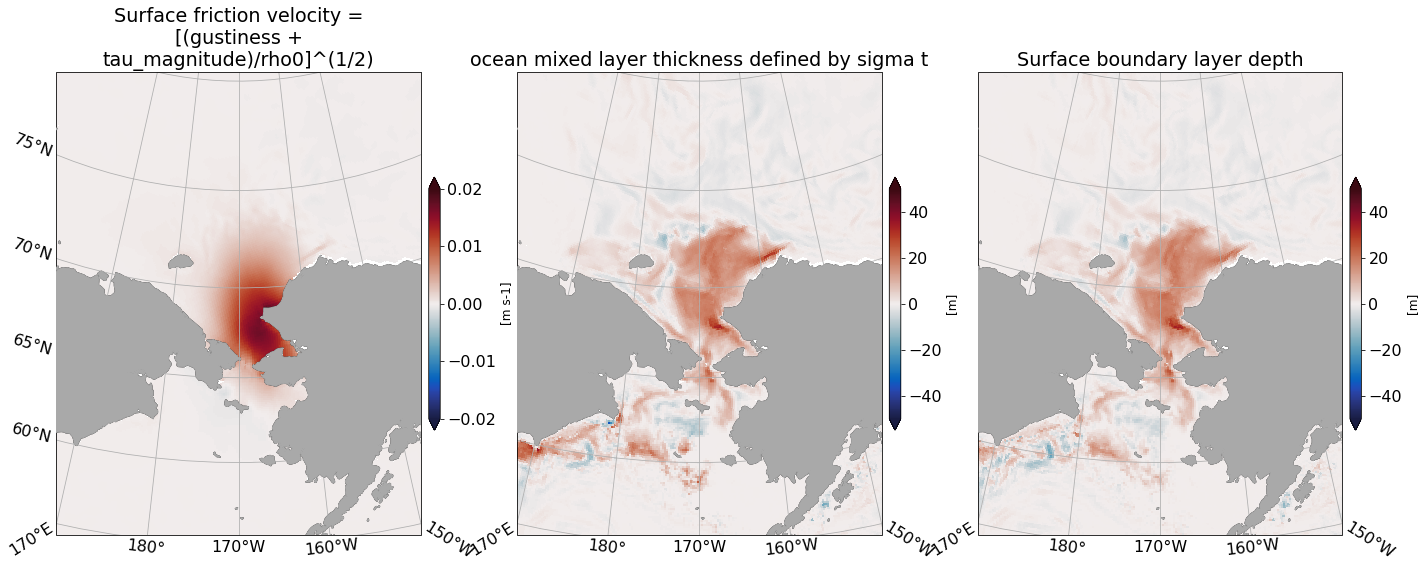

In [12]:
# surface mixed layer quantities
fig,ax = plt.subplotfig,ax = plt.subplots(figsize=(25,10),nrows=1,ncols=3,
                      subplot_kw={'projection':ccrs.LambertConformal(central_longitude=-170)})
fig.subplots_adjust(right=0.85)
# ustar
plt_2D_pert(ax[0],'ustar',0.02,False)
# mlotst
plt_2D_pert(ax[1],'mlotst',50,True)
# omldamax
plt_2D_pert(ax[2],'omldamax',50,True)

plt.show()
# save fig

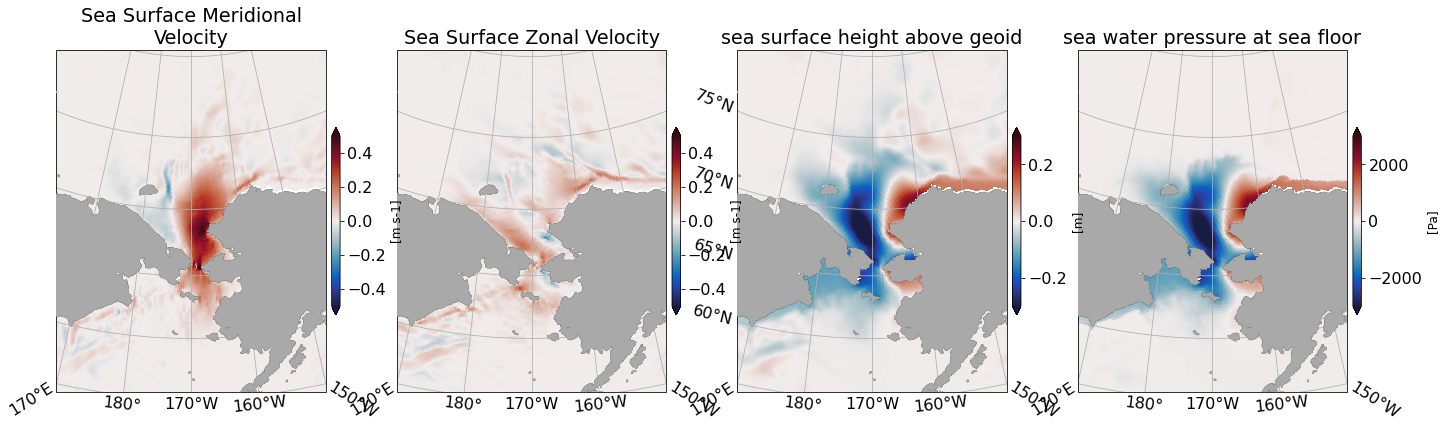

In [13]:
# surface currents, ssh, and bottom pressure
fig,ax = plt.subplotfig,ax = plt.subplots(figsize=(25,10),nrows=1,ncols=4,
                      subplot_kw={'projection':ccrs.LambertConformal(central_longitude=-170)})
fig.subplots_adjust(right=0.85)
# ssv
plt_2D_pert(ax[0],'ssv',0.5,True)
# ssu
plt_2D_pert(ax[1],'ssu',0.5,True)
# zos
plt_2D_pert(ax[2],'zos',0.3,False)
# pbo
plt_2D_pert(ax[3],'pbo',3000,True)
plt.show()
# save fig


IndexError: index 3 is out of bounds for axis 0 with size 3

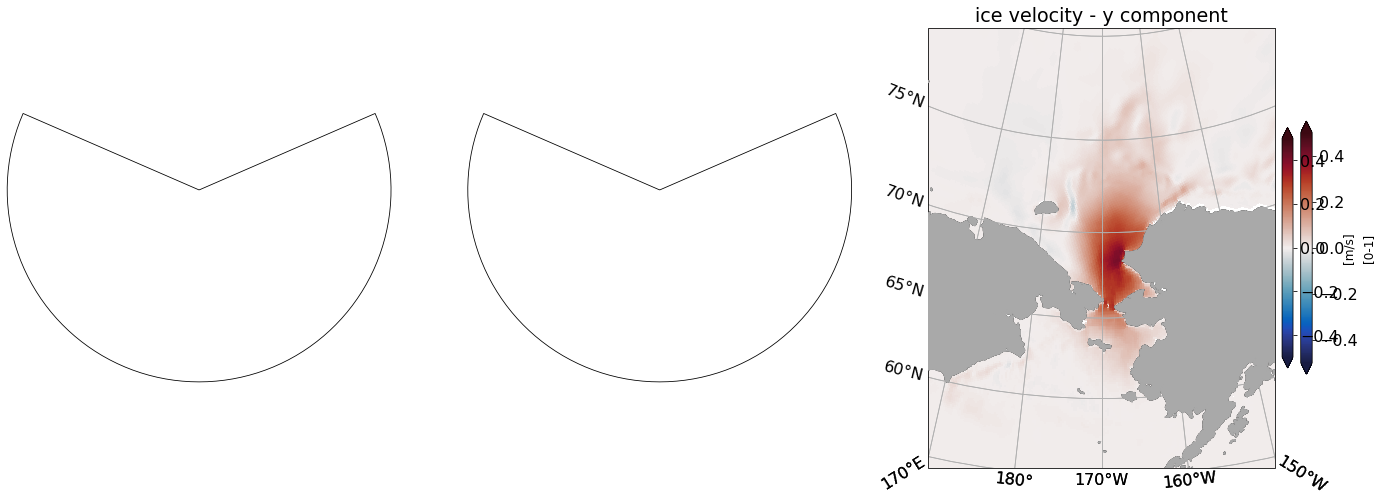

In [14]:
# siconc and sea ice velocities
fig,ax = plt.subplotfig,ax = plt.subplots(figsize=(25,10),nrows=1,ncols=3,
                      subplot_kw={'projection':ccrs.LambertConformal(central_longitude=-170)})
fig.subplots_adjust(right=0.85)
# siconc
plt_2D_pert(ax[0],'siconc',0.5,True)
# siv
plt_2D_pert(ax[1],'siv',0.5,False)
# siu
plt_2D_pert(ax[2],'siu',0.5,True)

plt.show()
# save fig


In [ ]:
# sst and sss
fig,ax = plt.subplotfig,ax = plt.subplots(figsize=(25,10),nrows=1,ncols=2,
                      subplot_kw={'projection':ccrs.LambertConformal(central_longitude=-170)})
fig.subplots_adjust(right=0.85)
# tos
plt_2D_pert(ax[0],'tos',3,False)
# sos
plt_2D_pert(ax[1],'sos',5,True)

plt.show()
# save fig
